<a href="https://colab.research.google.com/github/KBG1990/Estimating-quantum-non-Markovianity-using-machine-learning/blob/main/Simulation_non_markov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulating non-Markovian processes.


# Pauli Case.

## The joint Pij

In [ ]:
pip install numpy==1.15.4

     |████████████████████████████████| 13.8MB 13.1MB/s 
ERROR: tensorflow 2.1.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have tensorflow-estimator 1.15.0 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement google-auth-oauthlib<0.5,>=0.4.1, but you'll have google-auth-oauthlib 0.4.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [ ]:
pip install scipy==1.2.1

     |████████████████████████████████| 24.8MB 1.2MB/s 
ERROR: tensorflow 2.1.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement scipy==1.2.2; python_version < "3", but you'll have scipy 1.2.1 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorflow-estimator<2.2.0,>=2.1.0rc0, but you'll have tensorflow-estimator 1.15.0 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.2.2
    Uninstalling scipy-1.2.2:
      Successfully uninstalled scipy-1.2.2


In [ ]:
pip install cython==0.29.8

     |████████████████████████████████| 2.0MB 2.8MB/s 
  Found existing installation: Cython 0.29.12
    Uninstalling Cython-0.29.12:
      Successfully uninstalled Cython-0.29.12


In [ ]:
pip install matplotlib

In [ ]:
import numpy as np
import scipy as sp
import seaborn as sns

In [ ]:
print(np.version.version)
print(sp.version.version)
#print(cython.version.version)
#print(matplotlib.version.version)

1.16.4
1.2.2


In [ ]:
U_d = np.array([[[1,0],[0,1]],[[0, 1],[1, 0]], [[0, -1j],[1j, 0]], [[1, 0],[0, -1]]]) # Pauli matrices
# r[1] in [0,R], r[1:3] in [0,1] randomly chosen
def rand_arr(R):
    k = np.array([np.random.random(1)*R, np.random.random(1), np.random.random(1), np.random.random(1)])
    return k
  
  
def P_j(R):
    p = rand_arr(R) # fix it once
    return (p/sum(p)).flatten()
  
  
def P_ij(q,R):# The joint probability for the two unitaries
    res = np.zeros((4,4))
    pj = P_j(R) # So that it's fixed.
    pj1 = P_j(R)
    for i in range(4):
        for j in range(4):
            if j==i:
                res[i][j] = q*pj[j] + (1-q)*pj1[i]*pj[j] #(if q=1, P_x|x = 1 complete correlation, max non-Markovian)
            else:
                res[i][j] = (1-q)*pj1[i]*pj[j]
    return res

In [ ]:
print (sum(P_j(100)))
print (sum(sum(P_ij(.3,100))))
print ((P_ij(.3,100)))

1.0
1.0000000000000002
[[9.80452871e-01 4.09669807e-03 5.34957841e-04 1.56708582e-03]
 [4.36559933e-04 1.78547243e-03 3.41859009e-07 1.00142920e-06]
 [3.04764863e-03 1.82760547e-05 2.35196465e-04 6.99103170e-06]
 [7.07075673e-03 4.24017177e-05 5.53693022e-06 6.98204519e-04]]


## The process matrix

In [ ]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [ ]:
def choi(a):
    #input a matrix as an array and output its choi matrix
    a = a.reshape(1,a.shape[0]*a.shape[1])
    b = np.kron(a,np.conj(np.transpose(a)))
    return b

In [ ]:
# A process matrix, for U_i and U_j as the unitaries 
def w_d(i,j): 
    pure = np.array([[1 ,5.5+1j*3]])
    N = np.vdot(pure,pure)
    rho = np.kron(pure,np.conj(np.transpose(pure)))/N
    term1 = np.matmul(np.conj(np.transpose(U_d[i])), np.matmul(rho, U_d[i]))
    w = np.kron(term1, choi(U_d[j])) #  Not normalised.
    return w

In [ ]:
pure = np.array([[1 ,5.5+1j*3]])
N = np.vdot(pure,pure)
rho = np.matmul(np.conj(np.transpose(pure)),pure)/N
print(rho)

[[0.025+0.j    0.137+0.075j]
 [0.137-0.075j 0.975+0.j   ]]


In [ ]:
np.trace(w_d(3,3))

(2+0j)

In [ ]:
# The process matrix as a function of q and R
def W_d(q, R): 
    w = np.zeros((8,8),dtype=complex)
    p_ij = P_ij(q,R) # So that it's fixed.
    for i in range(4):
        for j in range(4):
            w = w + p_ij[i][j]*w_d(i,j) # Still unnormalised.
#     if (w.imag == np.zeros((8,8))).all(): # if there's no imaginary part, suppress it
#         w = w.real
    return w

In [ ]:
# W_d(0,10000)# for R>10^5, and q=1 W = W_d(0,0), both unitaries are identity

## Measure of non-Markovianity 
### 1. Norm distance

In [ ]:
pip install qutip==4.3.1


     |████████████████████████████████| 5.5MB 11.3MB/s 
  Created wheel for qutip: filename=qutip-4.3.1-cp27-cp27mu-linux_x86_64.whl size=8542622 sha256=bd9263607f0df1ac7c7558922d5c0f46e6232c2ff9514b0435a9150eaa95286d
  Stored in directory: /root/.cache/pip/wheels/7d/f1/a4/f5687d0ab63c65cd818a29e7826f6ad677887730290476aabc
Successfully built qutip


In [ ]:
import qutip as qt

In [ ]:
def norm_d(x):
  """Input: x, a non-normalized process matrix.
  Calculates the norm distance between x and the Markovian one,
  taken by the tensor product of the input state and channels.
  Note: works only for a W with three qubits (8,8)"""
  y = qt.Qobj(x,[[2,2,2],[2,2,2]])/2 # Normalize x.
  r = (y - qt.tensor(y.ptrace([0]),y.ptrace([1,2]))).norm() # AI/2 tensor AOBI (factor 2 is because to get AI we trace out AOBI).
  return r

In [ ]:
norm_d(W_d(1,1))

0.8735793880594991

### 2. Relative entropy

In [ ]:
from numpy import e, real, sort, sqrt
from scipy import log, log2
from qutip.qobj import ptrace
from qutip.states import ket2dm
from qutip.tensor import tensor
from qutip.operators import sigmay
from qutip.sparse import sp_eigs
from qutip.qip.gates import swap

def entropy_vn(rho, base=e, sparse=False):
    """
    Von-Neumann entropy of density matrix

    Parameters
    ----------
    rho : qobj
        Density matrix.
    base : {e,2}
        Base of logarithm.
    sparse : {False,True}
        Use sparse eigensolver.

    Returns
    -------
    entropy : float
        Von-Neumann entropy of `rho`.

    Examples
    --------
    >>> rho=0.5*fock_dm(2,0)+0.5*fock_dm(2,1)
    >>> entropy_vn(rho,2)
    1.0

    """
    if rho.type == 'ket' or rho.type == 'bra':
        rho = ket2dm(rho)
    vals = sp_eigs(rho.data, rho.isherm, vecs=False, sparse=sparse)
    nzvals = vals[vals != 0]
    if base == 2:
        logvals = log2(nzvals)
    elif base == e:
        logvals = log(nzvals)
    else:
        raise ValueError("Base must be 2 or e.")
    return float(real(-sum(nzvals * logvals)))

def _entropy_relative(rho, sigma, base=e, sparse=False):
    """
    ****NEEDS TO BE WORKED ON**** (after 2.0 release)
    C. G. : fixed the problem, some zeros were not removed because they were 0.0000.

    Calculates the relative entropy S(rho||sigma) between two density
    matrices..

    Parameters
    ----------
    rho : qobj
        First density matrix.
    sigma : qobj
        Second density matrix.
    base : {e,2}
        Base of logarithm.

    Returns
    -------
    rel_ent : float
        Value of relative entropy.

    """
    if rho.type != 'oper' or sigma.type != 'oper':
        raise TypeError("Inputs must be density matrices..")
    # sigma terms
    svals = sp_eigs(sigma.data, sigma.isherm, vecs=False, sparse=sparse) # returns eigenvalues of sigma (C.G.).
#     snzvals = svals[svals != 0] # EDIT: 0 is not enough to remove 0.000. C.G.
    snzvals = svals[svals > 0.0001]
    if base == 2:
        slogvals = log2(snzvals)
    elif base == e:
        slogvals = log(snzvals)
    else:
        raise ValueError("Base must be 2 or e.")
    # rho terms
    rvals = sp_eigs(rho.data, rho.isherm, vecs=False, sparse=sparse)
#     rnzvals = rvals[rvals != 0] # Same edit as above. C.G.
    rnzvals = svals[svals > 0.0001]
    # calculate tr(rho*log sigma)
    rel_trace = float(real(sum(rnzvals * slogvals)))
    return -entropy_vn(rho, base, sparse) - rel_trace

In [ ]:
# x = w_cliff(1,1)
# y = qt.Qobj(x,[[2,2,2],[2,2,2]])/2.0
# y_mark = qt.tensor(y.ptrace([0]),y.ptrace([1,2]))
# rvals = sp_eigs(y.data, y.isherm, vecs=False, sparse=False)
# rnzvals = rvals[rvals != 0] 
# svals = sp_eigs(y_mark.data, y_mark.isherm, vecs=False, sparse=False)
# snzvals = svals[svals > 0.0001]
# print x
# print y

In [ ]:
def rel_entr(x):
  """
  Input: x process matrix as an np.array.
  Calculates Relative Entropy of a process matrix x.
  """
  y = qt.Qobj(x,[[2,2,2],[2,2,2]])/2.0 # Turns into a q object, Normalised.
  y_mark = qt.tensor(y.ptrace([0]),y.ptrace([1,2])) # Calculates the Markovian of y.
  #res = _entropy_relative(y, y_mark, base=2, sparse=False)# calculate their relative entropy
  res = qt.entropy_vn(y.ptrace([0]), base=2) +  entropy_vn(y.ptrace([1,2]), base=2) - entropy_vn(y, base=2)
  return res

In [ ]:
def compare(q,R): # compare the norm distance vs the relative entropy of a process matrix with q and R
    mat = W_d(q,R)
    normd = norm_d(mat)
    rel = rel_entr(mat)
    return normd-rel

In [ ]:
# x = w_cliff(23,23)
# y = qt.Qobj(x,[[2,2,2],[2,2,2]])/2.0
# y_mark = qt.tensor(y.ptrace([0]),y.ptrace([1,2]))
# print sp_eigs(y.data, y.isherm, vecs=False, sparse=False)
# print sp_eigs(y_mark.data, y_mark.isherm, vecs=False, sparse=False)

## Rotated Paulis and Verification for obtaining the data

In [ ]:
pure = np.array([[1 ,5.5+1j*3]])
N = np.vdot(pure,pure)
rho = np.kron(pure,np.conj(np.transpose(pure)))/N
rho_q = qt.Qobj(rho)

print(rho_q)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.025+0.j    0.137+0.075j]
 [0.137-0.075j 0.975+0.j   ]]


In [ ]:
def sigma_i(i,x,y,z):
    return np.matmul(rot3(x,y,z).conj().T ,np.matmul(U_d[i],rot3(x,y,z)))

In [ ]:
def rot(x):
    return np.array([[np.cos(x), -np.sin(x)], [np.sin(x), np.cos(x)]])

In [ ]:
def rot3(x,y,z):
    r = np.cos(x/2)*U_d[0] - 1j*np.sin(x/2)*( np.sin(y)*np.sin(z)*U_d[1] + np.cos(y)*np.sin(z)*U_d[2] + np.cos(z)*U_d[3] )
    return r

In [ ]:
rot3(np.pi/8,np.pi/8,np.pi/8)

array([[ 0.981-0.18j , -0.069-0.029j],
       [ 0.069-0.029j,  0.981+0.18j ]])

In [ ]:
print(sigma_i(1,np.pi/8,np.pi/8,np.pi/8))
#print(sigma_i(2,np.pi/8,np.pi/8,np.pi/8))
#print(sigma_i(3,np.pi/8,np.pi/8,np.pi/8))
#print(sigma_i(0,np.pi/8,np.pi/8,np.pi/8))


[[ 0.146+0.j    0.926+0.35j]
 [ 0.926-0.35j -0.146+0.j  ]]


In [ ]:
U_d[2]

array([[0.+0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]])

In [ ]:
U_dq = lambda i : qt.Qobj(U_d[i])
sigma_iq = lambda i,x,y,z : qt.Qobj(sigma_i(i,x,y,z))

In [ ]:
#                           final measurement * U2 environment   * middle measurement(pi/8)  * U1 environment.
def outcomes(x,y): # x and y are the Pauli environment. i and j are running the measurements over the Paulis, rho_q is some random input state.
    out = np.zeros((4,4))
    for i in range(4):
        for j in range(4):
            out[i][j] = np.real((sigma_iq(j,0,0,0)* (sigma_iq(x,0,0,0)* sigma_iq(i,np.pi/8,np.pi/8,np.pi/8)* sigma_iq(y,0,0,0)* \
                              rho_q * sigma_iq(y,0,0,0).dag() * sigma_iq(i,np.pi/8,np.pi/8,np.pi/8).dag() * sigma_iq(x,0,0,0).dag())).tr())
    return out

In [ ]:
def the_data_ver(q,R):
    p = np.zeros((4,4))
    pij = P_ij(q,R)
    for i in range(4):
        for j in range(4):
            p =  p + pij[i][j]* outcomes(i,j)
    return p

In [ ]:
prob = P_ij(0.3,100)
data = np.zeros((4,4))
for i in range(4):
        for j in range(4):
            data =  data + prob[i][j]* outcomes(i,j)
print(data)    
print(prob)

[[ 1.000  0.240 -0.125 -0.825]
 [ 1.000  0.031  0.028  0.866]
 [ 1.000 -0.247  0.105  0.825]
 [ 1.000 -0.024 -0.008 -0.866]]
[[ 0.889  0.003  0.004  0.006]
 [ 0.039  0.002  0.000  0.000]
 [ 0.019  0.000  0.002  0.000]
 [ 0.032  0.000  0.000  0.003]]


In [ ]:
ver_test = the_data_ver(0.3,100) 
print(ver_test)
print(sum(ver_test))


[[ 1.000  0.245 -0.135 -0.851]
 [ 1.000  0.037  0.033  0.892]
 [ 1.000 -0.251  0.105  0.852]
 [ 1.000 -0.032 -0.003 -0.893]]
[ 4.000 -0.000  0.000  0.000]


## We obtain the data with Paulis

### Definitions.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
def rot(x):
    return np.array([[np.cos(x), -np.sin(x)], [np.sin(x), np.cos(x)]])
  
def rot3(x,y,z):
    r = np.cos(x/2)*U_d[0] - 1j*np.sin(x/2)*( np.sin(y)*np.sin(z)*U_d[1] + np.cos(y)*np.sin(z)*U_d[2] + np.cos(z)*U_d[3] )
    return r
def sigma_i(i,x,y,z):
    return np.matmul(rot3(x,y,z).conj().T ,np.matmul(U_d[i],rot3(x,y,z))) 

In [ ]:
# Simulating experimental data: for each unitary (I,x,y,z)/each row, we get 3 numbers (for x,y,z).
# We drop the z for the first unitary as their sum=0 (sum_i p(i|j)=0 for every j.
def the_data(q,R): 
    proc = W_d(q,R)
    res = np.zeros((3,3),dtype=complex)
    value = rel_entr(proc)
    for i in range(3): # The first measurement. We drop z.
        for j in range(1,4):# The final measurement. j runs for 1 to 3 for x y z, we drop I. 
                res[i][j-1] = np.trace(np.matmul(np.kron(choi(np.conj(sigma_i(i,np.pi/8,np.pi/8,np.pi/8))),sigma_i(j,0,0,0)),proc))
    return res,value

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/NON_MARKOV_KBG

/content/drive/My Drive/Colab Notebooks/NON_MARKOV_KBG


In [ ]:
import scipy.io as sio

In [ ]:

process = W_d(0.9,1)
#sio.savemat('np_process.mat', {'process_python':process})
rel_entr(process)

0.5774321306714525

In [ ]:
rel_entr((w_d(0,0) + w_d(1,1) + w_d(2,2) + w_d(3,3))/4)

1.0000000000000004

In [ ]:
[x, labels]  = the_data(1,1)
[y, labels2]  = the_data(0.8,1)

data = [x,y]
#print data
#print the_data(1,1)[0].sum(axis=0)
print(y)
print(np.reshape(data,(2,9)))


[[ 0.214+0.j -0.118+0.j -0.762+0.j]
 [ 0.125-0.j  0.097+0.j  0.739+0.j]
 [-0.16 +0.j -0.079+0.j  0.761+0.j]]
[[ 0.273+0.j -0.149+0.j -0.95 +0.j  0.049-0.j  0.174+0.j  0.94 +0.j
  -0.156+0.j -0.184-0.j  0.945+0.j]
 [ 0.214+0.j -0.118+0.j -0.762+0.j  0.125-0.j  0.097+0.j  0.739+0.j
  -0.16 +0.j -0.079+0.j  0.761+0.j]]


### Testing.

In [ ]:
# Testing time of data taking.
samples = 500
import time
start = time.time()
labels_01_10 = np.zeros(samples)
labels = labels_01_10
for i in range(samples):
    labels[i] = the_data(1,1)[1]
end = time.time()
print(end - start)

2.97795605659


(array([ 2.000,  2.000,  3.000,  4.000,  7.000,  12.000,  20.000,  33.000,
         81.000,  336.000]),
 array([ 0.310,  0.379,  0.448,  0.517,  0.586,  0.655,  0.724,  0.793,
         0.862,  0.931,  1.000]),
 <a list of 10 Patch objects>)

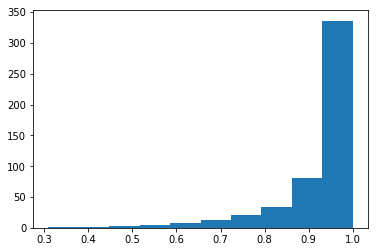

In [ ]:
plt.hist(labels)

### Setting path.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# Change directory to save/read the data.
cd /content/drive/My Drive/Colab Notebooks/NON_MARKOV_KBG/

SyntaxError: ignored

### Data taking

In [ ]:
import time
start = time.time()
df_all = pd.DataFrame(np.zeros((1,9)))
for q in np.array([0, 2, 4, 5, 6, 8, 9, 9.5, 10]) :
  for R in np.array([1,1.25,1.5,2,5,10]):
    if q==10 and R==1:
      samples=3*1024
    else:
      samples=1024
    data = np.zeros((samples,3,3)) 
    labels = np.zeros(samples)
    for i in range(samples): 
      data[[i]], labels[i] = the_data(q*0.1,R)

    data_new = data.reshape(samples, 9) 
    df_data = pd.DataFrame(data_new) 
    df_labels = pd.DataFrame(labels, columns = ['Labels'])
    df = df_data.join(df_labels, how='right')
#          Need to append data in one big file df_all
    df_all = df_all.append(df)
#         df.to_csv('Sdata_0%d_%d' %(q,R), index=False) # No need to save each dataframe anymore.
df_all = df_all.reset_index()
df_all = df_all.drop(0) # Drop the zeros of first line.
df_all = df_all.drop('index', axis=1)
# df_all.to_csv('Sim_data')
end = time.time()
print(end - start)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


343.808849812


0.9999909266303573
-2.886579864025407e-15


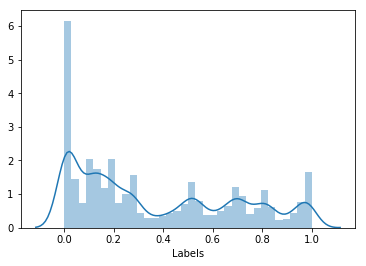

In [ ]:
#df_all = pd.read_csv('Sim_data_Pauli.csv')
#print(np.shape(df_all))
labels_P = df_all.iloc[:,-1]
# print labels_P.shape
sns.distplot(labels_P)
print labels_P.max()
print labels_P.min()

#test_data = pd.read_csv('experimental_data.csv', header=None)
#test_data = pd.read_csv('random_error.csv', header=None)

#test_data.index

#test_data.columns = ['1', '2', '3', '4', '5', '6', '7','8','9','Experimental label', 'Theoretical label']

#print(test_data.iloc[0:5,:])

In [ ]:
# plt.hist(labels_P, bins=30)

In [ ]:
df_all.to_csv('/content/drive/My Drive/Colab Notebooks/NON_MARKOV_KBG/Sim_data_Pauli_wide_range2.csv')


In [ ]:
# df_all.to_csv('Sim_data_Pauli.csv')

In [ ]:
# # Read the saved files
# df_Pauli = pd.read_csv('Sim_data_Pauli.csv')
# df_Cliff = pd.read_csv('Sim_data_Cliff.csv')
# # Reading the saved file created an extra column
# df_Pauli = df_Pauli.drop('Unnamed: 0', axis=1) 
# df_Cliff = df_Cliff.drop('Unnamed: 0', axis=1)

In [ ]:
# df_all.to_csv('/Users/uqcgiarm/Dropbox/Sally/Sim_data.csv')

In [ ]:
# df_Cliff.head()

## Non-Markovian cases.

In [ ]:
rel_entr(1.0/2*(w_d(0,0) + w_d(1,1)))

0.945432118518732

In [ ]:
rel_entr(1.0/4*(w_d(0,0) + w_d(1,1) + w_d(2,2) + w_d(3,3)))

1.0000000000000004

## Linear regression with Paulis

In [ ]:
import pandas as pd

Simulated_data = pd.read_csv('Sim_data_Pauli_wide_range2.csv')

df1 = Simulated_data.iloc[:,:]
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1 = df1.rename(columns = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, 'Labels':9}) ## This step is needed to match the names of the columns with the experimental data


Shuffled_simulated_data = sk.utils.shuffle(df1, random_state=10)             ## In last two lines, I shuffled the simulated and the experimental datasets, this steps are required to randomly select certain percentage of the rows from both of them. 


IOError: ignored

In [ ]:
print(df_all.iloc[0:2,8])
print(df_all.iloc[50000:10005,-1])
#print(test_data.iloc[0:2,0:9])
#print(test_data.iloc[0:5,-1])



1    0.172862
2    0.016144
Name: 8, dtype: float64
Series([], Name: Labels, dtype: float64)


Training and testing on the simulated data

In [ ]:
X = df_all.iloc[:, [2,5,8]].values
y = df_all.iloc[:, -1].values

X.shape

(57344, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101 )

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)
print(lm.intercept_)
lm.coef_
predictions = lm.predict(X_test)

-0.1650732749958751


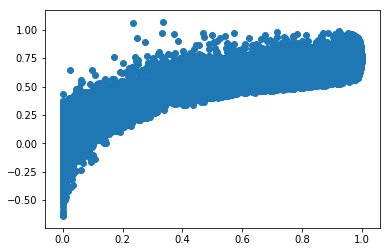

In [ ]:
plt.scatter(y_test,predictions)
# plt.plot(y_test,predictions, color='r')

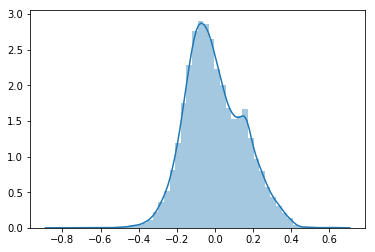

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics
mae_1 = metrics.mean_absolute_error(y_test,predictions)
mse_1 = metrics.mean_squared_error(y_test,predictions)
rmse_1 = np.sqrt(metrics.mean_squared_error(y_test,predictions))
r2_1 = metrics.r2_score(y_test,predictions) # best is 1 
r2_1

0.7823257551911539

Training and testing on the experimental data

In [ ]:
X = test_data.iloc[:, 0:9].values
y = test_data.iloc[:, -2].values



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101 )

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
print(lm.intercept_)

-0.8772463596145947


In [ ]:
lm.coef_

array([ 1.303, -1.226, -0.351,  0.014, -0.236, -0.041, -0.672, -0.493,
        0.796])

In [ ]:
predictions = lm.predict(X_test)

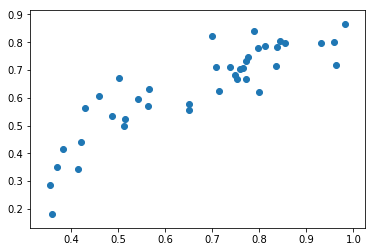

In [ ]:
plt.scatter(y_test,predictions)
# plt.plot(y_test,predictions, color='r')

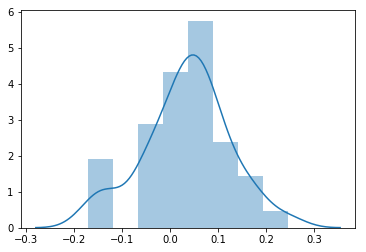

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics

In [ ]:
mae_1 = metrics.mean_absolute_error(y_test,predictions)
mse_1 = metrics.mean_squared_error(y_test,predictions)
rmse_1 = np.sqrt(metrics.mean_squared_error(y_test,predictions))
r2_1 = metrics.r2_score(y_test,predictions) # best is 1 
r2_1

0.7257395491400269

Training on the simulated data and testing on the experimental data

In [ ]:
X_train = df_all.iloc[:, 0:9].values
y_train = df_all.iloc[:, -1].values

X_test = test_data.iloc[:,0:9].values
y_test = test_data.iloc[:,-1].values

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)
print(lm.intercept_)
lm.coef_
predictions = lm.predict(X_test)

-1.268873819500254


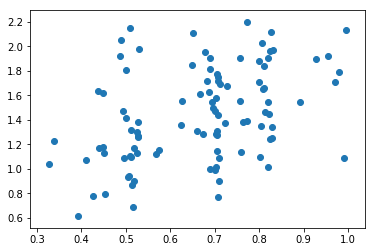

In [ ]:
plt.scatter(y_test,predictions)
# plt.plot(y_test,predictions, color='r')

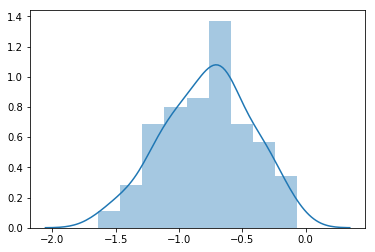

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics
mae_1 = metrics.mean_absolute_error(y_test,predictions)
mse_1 = metrics.mean_squared_error(y_test,predictions)
rmse_1 = np.sqrt(metrics.mean_squared_error(y_test,predictions))
r2_1 = metrics.r2_score(y_test,predictions) # best is 1 
r2_1

-29.36622957664495

Concatenating and Shuffling the simulated data and the experimental data. 
Saw it [here](https://www.freecodecamp.org/news/what-to-do-when-your-training-and-testing-data-come-from-different-distributions-d89674c6ecd8/) and [here](https://www.youtube.com/watch?v=sfk5h0yC67o).

As two datasets are coming from different distribution, the idea is to take a part of the experimental data (60%) and train them along with the simulated data. Then test the remaining 40% data.

In [ ]:
Simulated_data = pd.read_csv('Sim_data_Pauli_concentrated.csv')
test_data = pd.read_csv('experimental_data.csv', header=None)
import sklearn as sk
Shuffled_test_data = sk.utils.shuffle(test_data) # Shuffle the experimental data before partitioning. A good shuffling is necessary for a better result. Maybe shuffle a few times to maximise the entropy.



In [ ]:
df1 = Simulated_data.iloc[:,:]
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1 = df1.rename(columns = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, 'Labels':9}) ## This step is needed to make the index of two columns uniform

df2 = Shuffled_test_data.iloc[0:60,0:10] # Taking 60 datapoints for training


In [ ]:
frame = [df1, df2]
Concatenated_data = pd.concat(frame,ignore_index=True,axis = 0)

Tst_set = Shuffled_test_data.iloc[60:100,0:10]
Test_set = Tst_set.reset_index(drop=True)


print(df1.iloc[0:2,:])
print(df2.iloc[0:2,:])
print(df2.shape)
print(Test_set.iloc[0:2,:])
print(Test_set.shape)

          0         1         2  ...         7         8         9
0  0.218618 -0.112468 -0.762967  ... -0.094856  0.760232  0.529036
1  0.217124 -0.117067 -0.764751  ... -0.068510  0.765381  0.501993

[2 rows x 10 columns]
          0         1        2         3  ...        6         7        8        9
27  0.23562 -0.035152 -0.81840  0.163740  ... -0.13568  0.083368  0.86055  0.42212
44  0.33759 -0.089197 -0.80756  0.024776  ... -0.16744 -0.056968  0.87675  0.71903

[2 rows x 10 columns]
(60, 10)
         0         1        2        3  ...        6         7        8        9
0  0.25356 -0.093096 -0.61976  0.31602  ... -0.15309  0.022745  0.71347  0.38274
1  0.30581 -0.113100 -0.88809  0.13159  ... -0.20794  0.094652  0.96733  0.62941

[2 rows x 10 columns]
(40, 10)


In [ ]:
X_train = Concatenated_data.iloc[:,0:9].values
y_train = Concatenated_data.iloc[:,-1].values

X_test = Test_set.iloc[:,0:9].values
y_test = Test_set.iloc[:,-1].values


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)
print(lm.intercept_)
lm.coef_
predictions = lm.predict(X_test)

-1.26557341799249


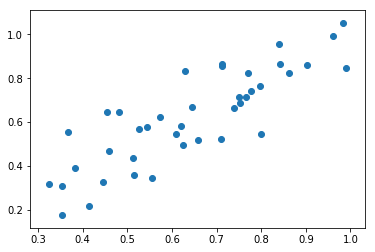

In [ ]:
plt.scatter(y_test,predictions)
# plt.plot(y_test,predictions, color='r')

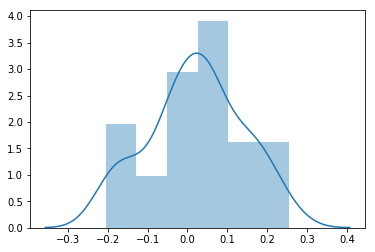

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics
mae_1 = metrics.mean_absolute_error(y_test,predictions)
mse_1 = metrics.mean_squared_error(y_test,predictions)
rmse_1 = np.sqrt(metrics.mean_squared_error(y_test,predictions))
r2_1 = metrics.r2_score(y_test,predictions) # best is 1 
r2_1


0.5816550611377753

## Polynomial regression with Paulis

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Degree 2

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)

In [ ]:
x_poly = polynomial_features.fit_transform(X)

In [ ]:
X.shape

(57344, 3)

In [ ]:
x_poly.shape

(57344, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.4, random_state=101 )

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
y_poly_pred = model.predict(X_test)

In [ ]:
predictions2 = y_poly_pred

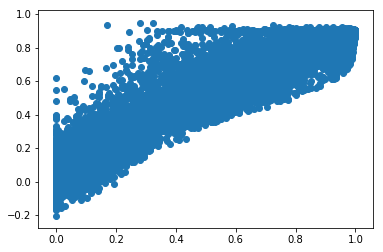

In [ ]:
plt.scatter(y_test,predictions2)

In [ ]:
print(model.intercept_)

0.009391059648796385


In [ ]:
mae_2 = metrics.mean_absolute_error(y_test,predictions2)
mse_2 = metrics.mean_squared_error(y_test,predictions2)
rmse_2 = np.sqrt(metrics.mean_squared_error(y_test,predictions2))
r2_2 = r2_score(y_test,predictions2) # best is 1 
r2_2

0.9207858506646618

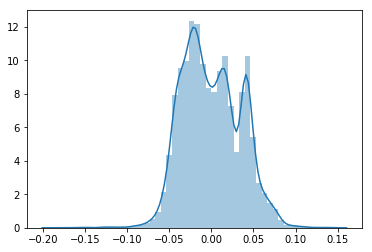

In [ ]:
sns.distplot((y_test-predictions2))

Testing on Experimental data

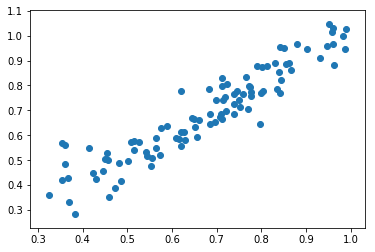

In [ ]:
## Here based on the shuffled and trained dataset I am trying to test the experimenta dataset

experimental_stokes = test_data.iloc[:,0:9]
experiment_poly = polynomial_features.fit_transform(experimental_stokes)
experimenta_label = test_data.iloc[:,-2]
predictions2 = model.predict(experiment_poly)
plt.scatter(experimenta_label,predictions2)

In [ ]:
## Gives 65% indicating rooms for improvement 
from sklearn import metrics
mae_1 = metrics.mean_absolute_error(experimenta_label,predictions2)
mse_1 = metrics.mean_squared_error(experimenta_label,predictions2)
rmse_1 = np.sqrt(metrics.mean_squared_error(experimenta_label,predictions2))
r2_1 = metrics.r2_score(experimenta_label,predictions2) # best is 1 
r2_1

0.8612054635257809

In [ ]:
# sns.pairplot(df_all, x_vars = np.array([0,1,2,3,4,5,6,7,8,9,10,11]), y_vars='Labels', size=7, aspect=0.7, kind='reg')

### Polynomial degree 4

In [ ]:
polynomial_features4= PolynomialFeatures(degree=4)

In [ ]:
x_poly4 = polynomial_features4.fit_transform(X)

In [ ]:
x_poly4.shape

(14436, 715)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_poly4, y, test_size=0.4, random_state=101 )

In [ ]:
model4 = LinearRegression()

In [ ]:
model4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
predictions4 = model4.predict(X_test)

In [ ]:
# model4.coef_

In [ ]:
# print(model4.intercept_)

In [ ]:
mae_4 = metrics.mean_absolute_error(y_test,predictions4)
mse_4 = metrics.mean_squared_error(y_test,predictions4)
rmse_4 = np.sqrt(metrics.mean_squared_error(y_test,predictions4))
r2_4 = r2_score(y_test,predictions4) # best is 1 
r2_4

-3107047.6988879917

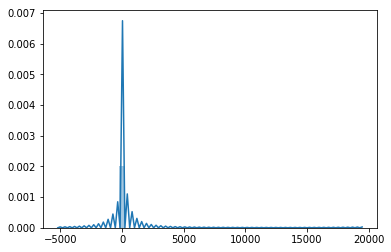

In [ ]:
sns.distplot((y_test-predictions4))

### Degree 5

In [ ]:
polynomial_features5= PolynomialFeatures(degree=5)

In [ ]:
x_poly5 = polynomial_features5.fit_transform(X)

In [ ]:
# x_poly5.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_poly5, y, test_size=0.4, random_state=101 )

In [ ]:
model5 = LinearRegression()

In [ ]:
model5.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
predictions5 = model5.predict(X_test)

In [ ]:
# print(model5.intercept_)

In [ ]:
mae_5 = metrics.mean_absolute_error(y_test,predictions4)
mse_5 = metrics.mean_squared_error(y_test,predictions4)
rmse_5 = np.sqrt(metrics.mean_squared_error(y_test,predictions4))
r2_5 = r2_score(y_test,predictions5) # best is 1 
r2_5

-0.06627136863064553

## Conclusion for Paulis

Text(0.5,1,'Degree 5')

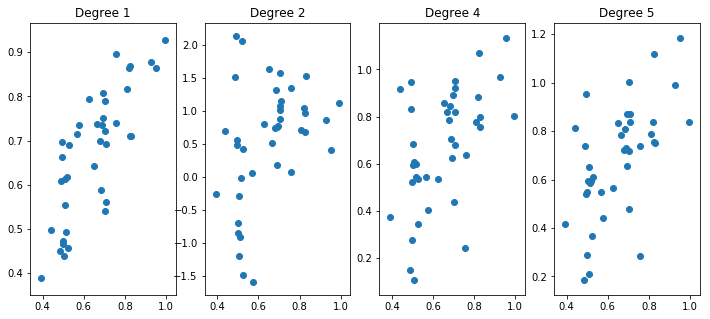

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(12,5))

axes[0].scatter(y_test, predictions) # lm model
axes[0].set_title("Degree 1")

axes[1].scatter(y_test, predictions2) # model
axes[1].set_title("Degree 2")

axes[2].scatter(y_test, predictions4) # model4
axes[2].set_title("Degree 4")

axes[3].scatter(y_test, predictions5) # model5
axes[3].set_title("Degree 5")

In [ ]:
lst = ['model', 'mean absolute error','mean squared error', 'sqrt(mean squared error)', 'score']
data_res = [['degree 1', mae_1, mse_1, rmse_1,r2_1], \
           ['degree 2', mae_2, mse_2, rmse_2,r2_2],\
           ['degree 4', mae_4, mse_4, rmse_4,r2_4],
            ['degree 5', mae_5, mse_5, rmse_5,r2_5]]
results = pd.DataFrame(data_res, columns = lst)
results

,model,mean absolute error,mean squared error,sqrt(mean squared error),score
0,degree 1,0.766938,0.615496,0.784536,-24.752284
1,degree 2,0.766938,0.615496,0.784536,-24.752284
2,degree 4,0.766938,0.615496,0.784536,-24.752284
3,degree 5,0.766938,0.615496,0.784536,-24.752284


,model,mean absolute error,mean squared error,sqrt(mean squared error),score
0,degree 1,0.095031,0.015741,0.125463,0.612899
1,degree 2,0.049027,0.004093,0.063977,0.899343
2,degree 4,0.034410,0.006591,0.081186,0.837908
3,degree 5,0.034410,0.006591,0.081186,-12.260133


# Cifford Case.

 U = V.W with V in {I, P, P^2, P^3} (with P the phase gate, P = diag(1,i)) and W in {I, H, H.P, H.P^2, H.P^3, H.P^2.H} (with H the Hadamard gate)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [ ]:
def rot(x):
    return np.array([[np.cos(x), -np.sin(x)], [np.sin(x), np.cos(x)]])
  
def rot3(x,y,z):
    r = np.cos(x/2)*U_d[0] - 1j*np.sin(x/2)*( np.sin(y)*np.sin(z)*U_d[1] + np.cos(y)*np.sin(z)*U_d[2] + np.cos(z)*U_d[3] )
    return r
def sigma_i(i,x,y,z):
    return np.matmul(rot3(x,y,z).conj().T ,np.matmul(U_d[i],rot3(x,y,z))) 

In [ ]:
P = np.array([[1, 0],[0, 1j]])
H = (1.0/np.sqrt(2))*np.array([[1, 1],[1, -1]])
P_2 = np.linalg.matrix_power(P,2)
P_3 = np.linalg.matrix_power(P,3)
V = np.array([np.eye(2), P, P_2, P_3])
W = np.array([np.eye(2), H, H.dot(P), H.dot(P_2), H.dot(P_3), reduce(np.dot, [H,P_2,H])])

In [ ]:
# Generates the Clifford group
cliff = np.zeros((24,2,2), dtype=complex)
for i in range(4):
    for j in range(6):
           cliff[(i+1)*(j+1)+ i*(5-j)-1] = np.matmul(V[i],W[j]) # index goes 0-23

In [ ]:
# Verify trace(choi(cliff))==2 and that they are unitary. Also, check their rel_entr
for i in range(24):
  if np.trace(choi(cliff[i])) - 2 > 0.000001:
    print('Something is wrong with.', i)
  elif (cliff[i].dot(np.transpose(np.conj(cliff[i]))) - np.eye(2) > 0.001).all():
    print('Something is wrong with.', i)

In [ ]:
# r[0] in [0,R], r[1:23] in [0,1] randomly chosen
def rand_arr_cliff(R):
    k = np.array([np.random.random(1)*R, np.random.random(1), np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1), np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1), np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1), np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1), np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1), np.random.random(1), np.random.random(1)])
    return k

In [ ]:
# To be worked on: this is to weight the rest of the joint probabilities such that they are more related.
def rand_cliff(R,r):
    k = np.array([np.random.random(1)*R, np.random.random(1)*r, np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1), np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1), np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1), np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1), np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1), np.random.random(1), np.random.random(1)])
    return k

In [ ]:
def P_j_cliff(R):
    p = rand_arr_cliff(R) # fix it once
    return (p/sum(p)).flatten()

In [ ]:
def P_ij_cliff(q,R):# The joint probability for the two unitaries
    res = np.zeros((24,24))
    pj = P_j_cliff(R) # So that it's fixed.
    pj1 = P_j_cliff(R)
    for i in range(24):
        for j in range(24):
            if j==i:
                res[i][j] = q*pj[j] + (1-q)*pj1[i]*pj[j] #(if q=1, P_x|x = 1 complete correlation, max non-Markovian)
            else:
                res[i][j] = (1-q)*pj1[i]*pj[j]
    return res

In [ ]:
sum(sum(P_ij_cliff(1,1)))

1.0

#### New process matrix for U clifford

In [ ]:
# A process matrix, for cliff[i] and cliff[j] as the unitaries from the clifford group
def w_cliff(i,k): 
#     pure = np.array([[1+np.sqrt(2) ,(1+1j)/sqrt(2)]])
    pure = np.array([[1.0 ,5.5+1j*3.0]])
    N = np.vdot(pure,pure)
    rho = np.kron(pure,np.conj(np.transpose(pure)))/N
    term1 = np.matmul(np.conj(np.transpose(cliff[i])), np.matmul(rho, cliff[i])) # np.matrix.getH gets the conjugate transpose
    w = np.kron(term1, choi(cliff[k])) #  Not normalised.
    return w

In [ ]:
np.trace(w_cliff(23,23))

(1.999999999999998+0j)

In [ ]:
# The process matrix as a function of q and R
def W_cliff(q, R): 
    w = np.zeros((8,8),dtype=complex)
    p_ = P_ij_cliff(q,R) # So that it's fixed.
    for i in range(24):
        for j in range(24):
            w = w + p_[i][j]*w_cliff(i,j) # Still unnormalised.
#     if (w.imag == np.zeros((8,8))).all(): # if there's no imaginary part, suppress it
#         w = w.real
    return w

In [ ]:
# Check the most non-Markovian case.
w = np.zeros((8,8),dtype=complex)
for i in range(24):
    w = w + (1.0/24)*w_cliff(i,i)
rel_entr(w)  

0.31127812445913694

In [ ]:
def permutations(iterable, r=None):
    # permutations('ABCD', 2) --> AB AC AD BA BC BD CA CB CD DA DB DC
    # permutations(range(3)) --> 012 021 102 120 201 210
    pool = tuple(iterable)
    n = len(pool)
    r = n if r is None else r
    if r > n:
        return
    indices = range(n)
    cycles = range(n, n-r, -1)
    yield tuple(pool[i] for i in indices[:r])
    while n:
        for i in reversed(range(r)):
            cycles[i] -= 1
            if cycles[i] == 0:
                indices[i:] = indices[i+1:] + indices[i:i+1]
                cycles[i] = n - i
            else:
                j = cycles[i]
                indices[i], indices[-j] = indices[-j], indices[i]
                yield tuple(pool[i] for i in indices[:r])
                break
        else:
            return

In [ ]:
np.trace(w)

(1.9999999999999987+3.7457502366448694e-36j)

In [ ]:
cliff[23].dot(np.transpose(np.conj(cliff[23])))

array([[1.+0.j, 0.-0.j],
       [0.+0.j, 1.+0.j]])

In [ ]:
rel_entr(W_cliff(1,1))

0.34058454810743877

#### Generate the data

In [ ]:
def the_data_cliff(q,R): # Simulating experimental data: for each unitary (I,x,y,z)/each row, we get 3 numbers, for x,y,z .
    proc = W_cliff(q,R)
    res = np.zeros((3,3), dtype=complex)
    value = rel_entr(proc)
    for i in range(3): # The first measurement .
        for j in range(1,4):# The final measurement. j runs for 1 to 3 for x y z 
                res[i][j-1] = np.trace(np.matmul(np.kron(choi(np.conj(sigma_i(i,np.pi/8,np.pi/8,np.pi/8))),sigma_i(j,0,0,0)),proc))
    return res,value

In [ ]:
# Comparing Pauli and Clifford data.
samples = 300
test = np.zeros(samples)
test2 = np.zeros(samples)
for i in range(samples):
  test[i] = rel_entr(W_cliff(1,1))
  test2[i] = rel_entr(W_d(1,1))
print test.max()
print test2.max()

0.4041068971610171
0.9997921937101266


(array([ 3.000,  6.000,  2.000,  7.000,  3.000,  7.000,  13.000,  28.000,
         52.000,  179.000]),
 array([ 0.429,  0.486,  0.543,  0.601,  0.658,  0.715,  0.772,  0.829,
         0.886,  0.943,  1.000]),
 <a list of 10 Patch objects>)

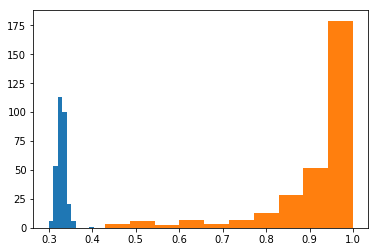

In [ ]:
plt.hist(test)
plt.hist(test2)

## Data taking with the Clifford

In [ ]:
import time

In [ ]:
#Clifford larger dataset is read-only. I uploaded it separately
cd /content/drive/My\ Drive/Colab\ Notebooks/NON_MARKOV_KBG

/content/drive/My Drive/Colab Notebooks/NON_MARKOV_KBG


In [ ]:
initial_samples = 1024
bias_sampling = 1
start = time.time()
df_all = pd.DataFrame(np.zeros((1,9)))
for q in np.array([7,8,9,9.5,10]) :
  for R in np.array([1,5,10,15]):
    if q > 9:
      samples=bias_sampling*initial_samples
    else:
      samples=initial_samples
    data = np.zeros((samples,3,3)) 
    labels = np.zeros(samples)
    for i in range(samples): 
      data[[i]], labels[i] = the_data_cliff(q*0.1,R)

    data_new = data.reshape(samples, 9) 
    df_data = pd.DataFrame(data_new) 
    df_labels = pd.DataFrame(labels, columns = ['Labels'])
    df = df_data.join(df_labels, how='right')
#          Need to append data in one big file df_all
    df_all = df_all.append(df)
#         df.to_csv('Sdata_0%d_%d' %(q,R), index=False) # No need to save each dataframe anymore.
df_all = df_all.reset_index()
df_all = df_all.drop(0) # Drop the zeros of first line.
df_all = df_all.drop('index', axis=1)
df_all.to_csv('Sim_data_Cliff_larger.csv')
end = time.time()
print((end - start)/60)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


16.1153758009


In [ ]:
df_all.shape
# plt.hist(df_all['Labels'], bins=50)

(20480, 10)

In [ ]:
# df_all.to_csv('/Users/uqcgiarm/Dropbox/Sally/Sim_data_Cliff.csv')

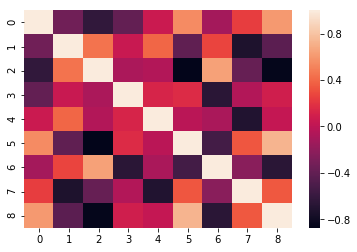

In [ ]:
data_corr = df_data.corr()
sns.heatmap(data_corr)

In [ ]:
test = the_data_cliff(1,1)
print test
print sum(test[0])

(array([[ 0.066+0.j, -0.081-0.j, -0.381+0.j],
       [-0.015+0.j,  0.021-0.j,  0.281+0.j],
       [-0.089-0.j,  0.117+0.j,  0.35 +0.j]]), 0.336463144172896)
[-0.038-0.j  0.057-0.j  0.251+0.j]


## Linear Regression with Clifford

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df_all[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
y = df_all['Labels']

In [ ]:
print(df_all.iloc[0:5,0:8])

          0         1         2  ...         5         6         7
1  0.140627 -0.086528 -0.305599  ...  0.213240 -0.072588  0.079466
2  0.091850 -0.045220 -0.227201  ...  0.170997 -0.077002  0.050979
3  0.067430  0.058546 -0.255228  ...  0.249805 -0.017782 -0.032975
4  0.154379 -0.024140 -0.171007  ...  0.170585 -0.057951  0.016125
5  0.062926 -0.041319 -0.168117  ...  0.163702 -0.115235  0.080894

[5 rows x 8 columns]


In [ ]:
X = df_all.iloc[:, 0:9].values
y = df_all.iloc[:, 9].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101 )

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
print(lm.intercept_)
lm.coef_

0.1232055327357307


array([ 0.035, -0.007,  0.044, -0.243,  0.104,  0.168, -0.283,  0.106,
        0.084])

In [ ]:
predictions = lm.predict(X_test)

### Plotting

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

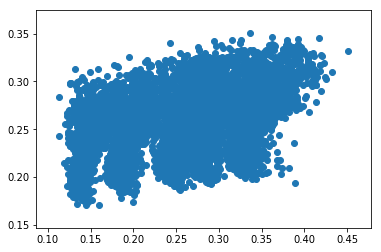

In [ ]:
plt.scatter(y_test,predictions)
# plt.plot(y_test,predictions, color='r')

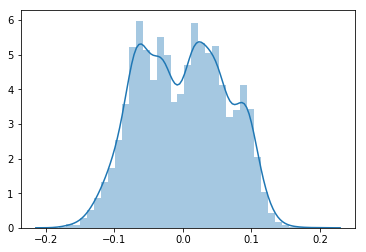

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics

In [ ]:
mae_1 = metrics.mean_absolute_error(y_test,predictions)
mse_1 = metrics.mean_squared_error(y_test,predictions)
rmse_1 = np.sqrt(metrics.mean_squared_error(y_test,predictions))
r2_1 = metrics.r2_score(y_test,predictions) # best is 1 
r2_1 #  was for the Pauli data 0.7281965333082403

0.24823498600249594

## Polynomial Regression with Clifford

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Degree 2

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)

In [ ]:
x_poly = polynomial_features.fit_transform(X)

In [ ]:
X.shape

(20480, 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.4, random_state=101 )

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
y_poly_pred = model.predict(X_test)

In [ ]:
predictions2 = y_poly_pred

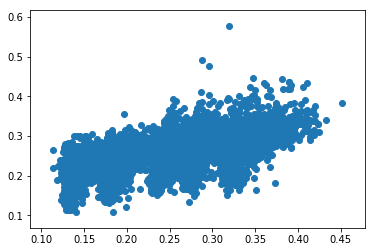

In [ ]:
plt.scatter(y_test,predictions2)

In [ ]:
print(model.intercept_)

-0.016196775657357276


In [ ]:
mae_2 = metrics.mean_absolute_error(y_test,predictions2)
mse_2 = metrics.mean_squared_error(y_test,predictions2)
rmse_2 = np.sqrt(metrics.mean_squared_error(y_test,predictions2))
r2_2 = r2_score(y_test,predictions2) # best is 1 
r2_2 # for paulis was 0.90

0.48906207595088036

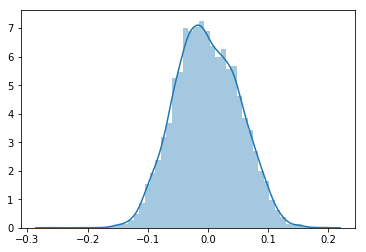

In [ ]:
sns.distplot((y_test-predictions2))

In [ ]:
# sns.pairplot(df_all, x_vars = np.array([0,1,2,3,4,5,6,7,8,9,10,11]), y_vars='Labels', size=7, aspect=0.7, kind='reg')

### Polynomial degree 4

In [ ]:
polynomial_features4= PolynomialFeatures(degree=4)

In [ ]:
x_poly4 = polynomial_features4.fit_transform(X)

In [ ]:
x_poly4.shape

(20480, 715)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_poly4, y, test_size=0.4, random_state=101 )

In [ ]:
model4 = LinearRegression()

In [ ]:
model4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
predictions4 = model4.predict(X_test)

In [ ]:
print(model4.intercept_)

-0.42290279177716383


In [ ]:
mae_4 = metrics.mean_absolute_error(y_test,predictions4)
mse_4 = metrics.mean_squared_error(y_test,predictions4)
rmse_4 = np.sqrt(metrics.mean_squared_error(y_test,predictions4))
r2_4 = r2_score(y_test,predictions4) # best is 1 
r2_4 # 0.722 for Paulis

0.496201332104543

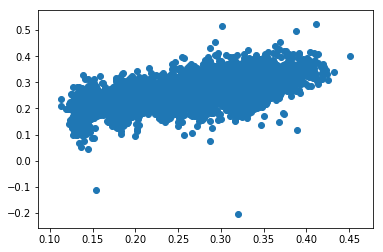

In [ ]:
plt.scatter(y_test,predictions4)

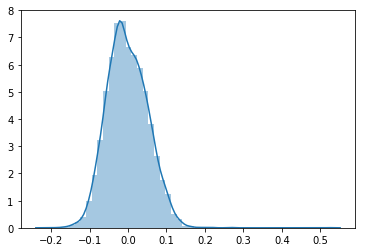

In [ ]:
sns.distplot((y_test-predictions4), bins=50)

### Degree 5

In [ ]:
polynomial_features5= PolynomialFeatures(degree=5)

In [ ]:
x_poly5 = polynomial_features5.fit_transform(X)

In [ ]:
x_poly5.shape

(20480, 2002)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_poly5, y, test_size=0.4, random_state=101 )

In [ ]:
model5 = LinearRegression()

In [ ]:
model5.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
predictions5 = model5.predict(X_test)

In [ ]:
print(model5.intercept_)

0.05912249764898325


In [ ]:
mae_5 = metrics.mean_absolute_error(y_test,predictions4)
mse_5 = metrics.mean_squared_error(y_test,predictions4)
rmse_5 = np.sqrt(metrics.mean_squared_error(y_test,predictions4))
r2_5 = r2_score(y_test,predictions5) # best is 1 
r2_5

0.20969807017996678

## Conclusion for Clifford

Text(0.5,1,'Degree 5')

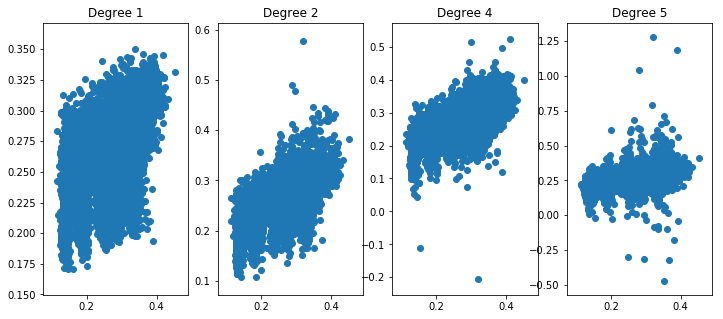

In [ ]:
fig, axes = plt.subplots(1,4, figsize=(12,5))

axes[0].scatter(y_test, predictions) # lm model
axes[0].set_title("Degree 1")

axes[1].scatter(y_test, predictions2) # model
axes[1].set_title("Degree 2")

axes[2].scatter(y_test, predictions4) # model4
axes[2].set_title("Degree 4")

axes[3].scatter(y_test, predictions5) # model5
axes[3].set_title("Degree 5")

In [ ]:
lst = ['Degree', 'mean absolute error','mean squared error', 'sqrt(mean squared error)', 'score']
data_res = [[' 1', mae_1, mse_1, rmse_1,r2_1], \
           [' 2', mae_2, mse_2, rmse_2,r2_2],\
           [' 4', mae_4, mse_4, rmse_4,r2_4],
            [' 5', mae_5, mse_5, rmse_5,r2_5]]
results = pd.DataFrame(data_res, columns = lst)

In [ ]:
results

,Degree,mean absolute error,mean squared error,sqrt(mean squared error),score
0,1,0.054488,0.004090,0.063955,0.248235
1,2,0.043049,0.002780,0.052725,0.489062
2,4,0.042235,0.002741,0.052355,0.496201
3,5,0.042235,0.002741,0.052355,0.209698


# 6 Clifford Case.

## Definitions.

In [ ]:
# 6 Unitaries from the witness project. I X Y Z (Y+Z) (X+Z) /sqrt2.
U6 = np.array([U_d[0], U_d[1], U_d[2], U_d[3], 1.0/sqrt(2)*(U_d[2]+U_d[3]), 1.0/sqrt(2)*(U_d[1]+U_d[3])])

In [ ]:
# Verify trace(choi(cliff))==2 and that they are unitary. Also, check their rel_entr
for i in range(6):
  if np.trace(choi(U6[i])) - 2 > 0.000001:
    print('Something is wrong with.', i)
  elif (U6[i].dot(np.transpose(np.conj(U6[i]))) - np.eye(2) > 0.001).all():
    print('Something is wrong with.', i)

In [ ]:
# r[1] in [0,R], r[1:3] in [0,1] randomly chosen
def rand_arr_cliff6(R):
    k = np.array([np.random.random(1)*R, np.random.random(1), np.random.random(1), np.random.random(1)\
                 , np.random.random(1), np.random.random(1)])
    return k

In [ ]:
def P_j_cliff6(R):
    p = rand_arr_cliff6(R) # fix it once
    return (p/sum(p)).flatten()

In [ ]:
def P_ij_cliff6(q,R):# The joint probability for the two unitaries
    res = np.zeros((6,6))
    pj = P_j_cliff6(R) # So that it's fixed.
    pj1 = P_j_cliff6(R)
    for i in range(6):
        for j in range(6):
            if j==i:
                res[i][j] = q*pj[j] + (1-q)*pj1[i]*pj[j] #(if q=1, P_x|x = 1 complete correlation, max non-Markovian)
            else:
                res[i][j] = (1-q)*pj1[i]*pj[j]
    return res

In [ ]:
# sum(sum(P_ij_cliff6(1,1)))
# sum(P_j_cliff6(8))

In [ ]:
def w_cliff6(i,k): 
#     pure = np.array([[1+np.sqrt(2) ,(1+1j)/sqrt(2)]])
    pure = np.array([[1.0 ,5.5+1j*3.0]])
    N = np.vdot(pure,pure)
    rho = np.kron(pure,np.conj(np.transpose(pure)))/N
    term1 = np.matmul(np.conj(np.transpose(U6[i])), np.matmul(rho, U6[i])) # np.matrix.getH gets the conjugate transpose
    w = np.kron(term1, choi(U6[k])) #  Not normalised.
    return w

In [ ]:
np.trace(w_cliff6(5,1))

(1.9999999999999996+0j)

In [ ]:
# Check the most non-Markovian case.
w = np.zeros((8,8),dtype=complex)
for i in range(6):
    w = w + (1.0/6)*w_cliff6(i,i)    
rel_entr(w)  

0.571759356124601

In [ ]:
# The process matrix as a function of q and R
def W_cliff6(q, R): 
    w = np.zeros((8,8),dtype=complex)
    p_ = P_ij_cliff6(q,R) # So that it's fixed.
    for i in range(6):
        for j in range(6):
            w = w + p_[i][j]*w_cliff6(i,j) # Still unnormalised.
#     if (w.imag == np.zeros((8,8))).all(): # if there's no imaginary part, suppress it
#         w = w.real
    return w

In [ ]:
def the_data_cliff6(q,R): # Simulating experimental data: for each unitary (I,x,y,z)/each row, we get 3 numbers, for x,y,z .
    proc = W_cliff6(q,R)
    res = np.zeros((3,3), dtype=complex)
    value = rel_entr(proc)
    for i in range(3): # The first measurement .
        for j in range(1,4):# The final measurement. j runs for 1 to 3 for x y z 
                res[i][j-1] = np.trace(np.matmul(np.kron(choi(np.conj(sigma_i(i,np.pi/8,np.pi/8,np.pi/8))),sigma_i(j,0,0,0)),proc))
    return res,value

In [ ]:
sum(the_data_cliff6(1,1)[0])

array([ 0.205-0.j, -0.011-0.j,  0.237+0.j])

In [ ]:
test = the_data_cliff(1,1)
sumt = sum(test[0])
print sumt

[0.073+0.j 0.049-0.j 0.374-0.j]


## Testing.

In [ ]:
# Comparing Cliff24 and Cliff6 data.
samples = 400
test = np.zeros(samples)
test1 = np.zeros(samples)
test2 = np.zeros(samples)
for i in range(samples):
  test[i] = rel_entr(W_cliff(1,1))
  test1[i] = rel_entr(W_d(1,1))
  test2[i] = rel_entr(W_cliff6(1,1))
print test.max()
print test1.max()
print test2.max()

0.38653743462135504
0.999842206403109
0.9023841588187009


(array([ 15.000,  29.000,  39.000,  91.000,  79.000,  71.000,  43.000,
         17.000,  13.000,  3.000]),
 array([ 0.366,  0.419,  0.473,  0.527,  0.580,  0.634,  0.688,  0.741,
         0.795,  0.849,  0.902]),
 <a list of 10 Patch objects>)

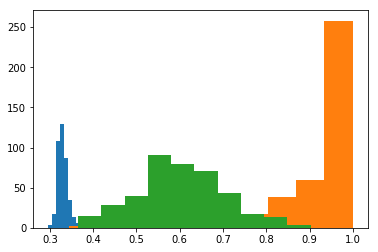

In [ ]:
plt.hist(test)
plt.hist(test1)
plt.hist(test2)

## Data taking.

In [ ]:
start = time.time()
samples = 1024
df_all = pd.DataFrame(np.zeros((1,9)))
data = np.zeros((samples,3,3))
labels = np.zeros(samples)
for q in np.array([8, 9, 10]) :
    for R in np.array([1, 2, 5]):
        for i in range(samples):
            data[[i]], labels[i] = the_data_cliff6(q*0.1,R)

        data_new = data.reshape(samples, 9) # Make the data vectors.
        df_data = pd.DataFrame(data_new) 
        df_labels = pd.DataFrame(labels, columns = ['Labels'])
        df = df_data.join(df_labels, how='right')
#          Need to append data in one big file df_all.
        df_all = df_all.append(df)
#         df.to_csv('Sdata_0%d_%d' %(q,R), index=False) # No need to save each dataframe anymore.
df_all = df_all.reset_index()
df_all = df_all.drop(0) # Drop the zeros of first line.
df_all = df_all.drop('index', axis=1)
df_all.to_csv('Sim_data_Cliff6.csv')
end = time.time()
print(end - start)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


63.3694989681


## Linear regression for Clifford 6.

In [ ]:
X = df_all[[0, 1, 2, 3, 4, 5, 6, 7, 8]]
y = df_all['Labels']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101 )

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
print(lm.intercept_)

-0.8282773424179699


In [ ]:
lm.coef_

array([ 1.618,  0.527, -0.804,  0.030,  0.833, -0.003,  0.469,  0.358,
        0.490])

In [ ]:
predictions = lm.predict(X_test)

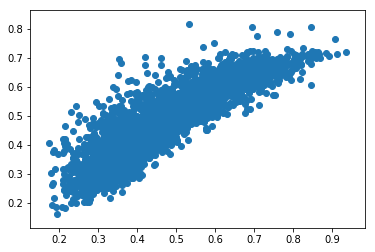

In [ ]:
plt.scatter(y_test,predictions)
# plt.plot(y_test,predictions, color='r')

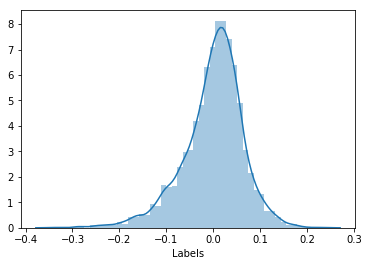

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics

In [ ]:
mae_1 = metrics.mean_absolute_error(y_test,predictions)
mse_1 = metrics.mean_squared_error(y_test,predictions)
rmse_1 = np.sqrt(metrics.mean_squared_error(y_test,predictions))
r2_1 = metrics.r2_score(y_test,predictions) # best is 1 
r2_1

0.7903243700833589

# IX Case.

## Definitions and testing.

In [ ]:
U_ix = np.array([[[1,0],[0,1]] , [[0, 1],[1, 0]]]) # Pauli matrices I X
def rand_arr_ix(R):
    k = np.array([np.random.random(1)*R, np.random.random(1)])
    return k
  
  
def P_j_ix(R):
    p = rand_arr_ix(R) # fix it once
    return (p/sum(p)).flatten()
  
  
def P_ij_ix(q,R):# The joint probability for the two unitaries
    res = np.zeros((2,2))
    pj = P_j_ix(R) # So that it's fixed.
    pj1 = P_j_ix(R)
    for i in range(2):
        for j in range(2):
            if j==i:
                res[i][j] = q*pj[j] + (1-q)*pj1[i]*pj[j] #(if q=1, P_x|x = 1 complete correlation, max non-Markovian)
            else:
                res[i][j] = (1-q)*pj1[i]*pj[j]
    return res

In [ ]:
P_ij_ix(1,1)

array([[ 0.122,  0.000],
       [ 0.000,  0.878]])

In [ ]:
# A process matrix, for IX
def w_ix(i,j): 
    pure = np.array([[1 ,5.5+1j*3]])
    N = np.vdot(pure,pure)
    rho = np.kron(pure,np.conj(np.transpose(pure)))/N
    term1 = np.matmul(np.conj(np.transpose(U_ix[i])), np.matmul(rho, U_ix[i]))
    w = np.kron(term1, choi(U_ix[j])) #  Not normalised.
    return w

In [ ]:
# The process matrix as a function of q and R
def W_ix(q, R): 
    w = np.zeros((8,8),dtype=complex)
    p_ij = P_ij_ix(q,R) # So that it's fixed.
    for i in range(2):
        for j in range(2):
            w = w + p_ij[i][j]*w_ix(i,j) # Still unnormalised.
#     if (w.imag == np.zeros((8,8))).all(): # if there's no imaginary part, suppress it
#         w = w.real
    return w

In [ ]:
def the_data_ix(q,R): 
    proc = W_ix(q,R)
    res = np.zeros((3,3),dtype=complex)
    value = rel_entr(proc)
    for i in range(3): # The first measurement. We drop z.
        for j in range(1,4):# The final measurement. j runs for 1 to 3 for x y z, we drop I. 
                res[i][j-1] = np.trace(np.matmul(np.kron(choi(np.conj(sigma_i(i,np.pi/8,np.pi/8,np.pi/8))),sigma_i(j,0,0,0)),proc))
    return res,value

(array([ 3.000,  5.000,  1.000,  1.000,  3.000,  0.000,  3.000,  9.000,
         15.000,  60.000]),
 array([ 0.056,  0.145,  0.234,  0.323,  0.412,  0.501,  0.590,  0.679,
         0.768,  0.856,  0.945]),
 <a list of 10 Patch objects>)

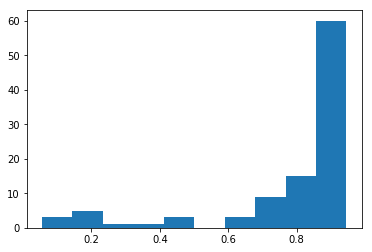

In [ ]:
samples=100
test4 = np.zeros(samples)
for i in range(samples):
  test4[i] = the_data_ix(1,1)[1]
plt.hist(test4)

## Data taking.

In [ ]:
start = time.time()
samples = 2048
df_all = pd.DataFrame(np.zeros((1,9)))
data = np.zeros((samples,3,3))
labels = np.zeros(samples)
for q in np.array([8, 9, 10]) :
    for R in np.array([1, 2, 5]):
        for i in range(samples):
            data[[i]], labels[i] = the_data_ix(q*0.1,R)

        data_new = data.reshape(samples, 9) # Make the data vectors.
        df_data = pd.DataFrame(data_new) 
        df_labels = pd.DataFrame(labels, columns = ['Labels'])
        df = df_data.join(df_labels, how='right')
#          Need to append data in one big file df_all.
        df_all = df_all.append(df)
#         df.to_csv('Sdata_0%d_%d' %(q,R), index=False) # No need to save each dataframe anymore.
df_all = df_all.reset_index()
df_all = df_all.drop(0) # Drop the zeros of first line.
df_all = df_all.drop('index', axis=1)
df_all.to_csv('Sim_data_IX.csv')
end = time.time()
print(end - start)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


37.6612021923


In [ ]:
df_all['Labels'].describe()

count    1200.000000
mean        0.486922
std         0.235461
min        -0.000018
25%         0.326010
50%         0.490126
75%         0.654705
max         0.945432
Name: Labels, dtype: float64

(array([ 354.000,  544.000,  682.000,  945.000,  1258.000,  1683.000,
         1162.000,  951.000,  480.000,  1157.000]),
 array([-0.001,  0.094,  0.189,  0.283,  0.378,  0.472,  0.567,  0.662,
         0.756,  0.851,  0.945]),
 <a list of 10 Patch objects>)

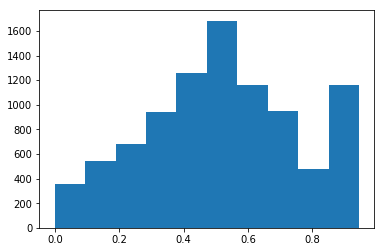

In [ ]:
plt.hist(df_all['Labels'])

# Adding more testing unitaries for the case where the model cannot predict the labels well. 

### From the Clifford group

In [ ]:
def sigma_rot(x,y):
  return sigma_i(x,y,y,y)

In [ ]:
# First, we want add four more measurements for each test unitary.
y = np.pi/8
z = 0
U1_add = np.array([sigma_rot(0,y), sigma_rot(1,y), sigma_rot(2,y), sigma_rot(3,y), cliff[10], cliff[20] ])
U2_add = np.array([sigma_rot(0,z), sigma_rot(1,z), sigma_rot(2,z), sigma_rot(3,z), cliff[10], cliff[20] ])

In [ ]:
cliff[3]

array([[ 0.707, -0.707],
       [ 0.707,  0.707]])

#### Generate the data

In [ ]:
def the_data_cliff_add(q,R): # Simulating experimental data: for each unitary (I,x,y,z)/each row, we get 3 numbers, for x,y,z .
    proc = W_cliff(q,R)
    res = np.zeros((6,6))
    value = rel_entr(proc)
    for i in range(6): # The first measurement.
        for j in range(6):# The final measurement. j runs for 1 to 3 for x y z 
                res[i][j] = np.trace(np.matmul(np.kron(choi(np.conj(U1_add[i])),U2_add[j]),proc))
    return res,value

In [ ]:
test = the_data_cliff_add(1,1)
print(test)
sum(test[0])

(array([[ 0.396,  0.045, -0.052, -0.113, -0.080, -0.080],
       [ 0.398,  0.004,  0.081,  0.195,  0.138,  0.138],
       [ 0.394, -0.038, -0.082,  0.200,  0.141,  0.141],
       [ 0.393, -0.014,  0.053, -0.106, -0.075, -0.075],
       [ 0.198, -0.021,  0.026, -0.050, -0.036, -0.036],
       [ 0.198, -0.021,  0.026, -0.050, -0.036, -0.036]]), 0.4193383669981521)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


array([ 1.977, -0.046,  0.052,  0.076,  0.054,  0.054])

## New Data taking with the adding testing Unitaries from Clifford

In [ ]:
import time

In [ ]:
# Testing the max non-Markovianity for a small sample and for q = 1, R = 1.
sample = 100
testing = np.zeros(sample)
for i in range(sample):
    testing[i] = the_data_cliff_add(1,1)[1]
print(testing.max())

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


0.45840488575176086


In [ ]:
# This has NOT BEEN EDITED for this section
start = time.time()
samples = 2048
df_all = pd.DataFrame(np.zeros((1,12)))
data = np.zeros((samples,4,3))
labels = np.zeros(samples)
for q in np.array([0, 3, 6, 8, 9, 10]) :
    for R in np.array([1, 10, 100, 1000]):
        for i in range(samples):
            data[[i]], labels[i] = the_data_cliff_add(q*0.1,R)

        data_new = data.reshape(samples, 12) # Make the data vectors.
        df_data = pd.DataFrame(data_new) 
        df_labels = pd.DataFrame(labels, columns = ['Labels'])
        df = df_data.join(df_labels, how='right')
#          Need to append data in one big file df_all.
        df_all = df_all.append(df)
#         df.to_csv('Sdata_0%d_%d' %(q,R), index=False) # No need to save each dataframe anymore.
df_all = df_all.reset_index()
df_all = df_all.drop(0) # Drop the zeros of first line.
df_all = df_all.drop('index', axis=1)
df_all.to_csv('Sim_data_Cliff_add.csv')
end = time.time()
print(end - start)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


2549.5753541


In [ ]:
df_all.to_csv('/content/drive/My Drive/Colab Notebooks/Sim_data_Cliff_add.csv')

In [ ]:
# Read the saved data
df_Cliff = pd.read_csv('Sim_data_Cliff.csv')

In [ ]:
df_Cliff['Labels'].max()

In [ ]:
df_all['Labels'].describe()

count    49152.000000
mean         0.236315
std          0.148656
min          0.005646
25%          0.089888
50%          0.302747
75%          0.368357
max          0.496510
Name: Labels, dtype: float64

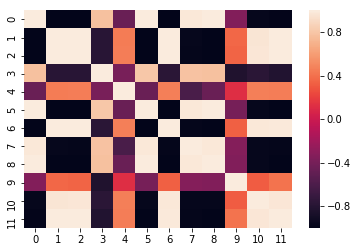

In [ ]:
data_corr = df_data.corr()
sns.heatmap(data_corr)

# Testing regressor for transferable learning (Pauli, Cliff)

In [ ]:
# Read the saved files
df_Pauli = pd.read_csv('Sim_data_Pauli_12.csv')
df_Cliff = pd.read_csv('Sim_data_Cliff.csv')
# Reading the saved file created an extra column
df_Pauli = df_Pauli.drop('Unnamed: 0', axis=1) 
df_Cliff = df_Cliff.drop('Unnamed: 0', axis=1)

In [ ]:
# _P is for Pauli data, _C is for Clifford data.
X_P = df_Pauli.drop('Labels', axis=1)
y_P = df_Pauli['Labels']
X_C = df_Cliff.drop('Labels', axis=1)
y_C = df_Cliff['Labels']

In [ ]:
y_P.describe()

count    6.144000e+04
mean     3.308033e-02
std      8.064260e-02
min     -1.165734e-15
25%      2.138724e-04
50%      3.741097e-03
75%      2.187719e-02
max      6.750083e-01
Name: Labels, dtype: float64

In [ ]:
y_C.describe()

count    49152.000000
mean         0.236315
std          0.148656
min          0.005646
25%          0.089888
50%          0.302747
75%          0.368357
max          0.496510
Name: Labels, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_P_train, X_P_test, y_P_train, y_P_test = train_test_split(X_P, y_P, test_size=0.4, random_state=101 )
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, y_C, test_size=0.4, random_state=101 )

### We train with Pauli data, we test Clifford ones.

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_P_train, y_P_train) # Train on Pauli data.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
# print(lm.intercept_)
# lm.coef_

In [ ]:
predictions_P = lm.predict(X_P_test)
predictions_PC = lm.predict(X_C_test)

### We train with Clifford data, we test Pauli.

In [ ]:
lm_CP = LinearRegression()

In [ ]:
lm_CP.fit(X_C_train, y_C_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
predictions_C = lm_CP.predict(X_C_test)
predictions_CP = lm_CP.predict(X_P_test)

### Trained on Pauli data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

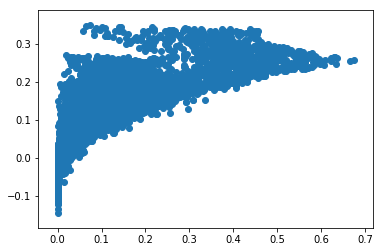

In [ ]:
plt.scatter(y_P_test,predictions_P)

# plt.plot(y_test,predictions, color='r')

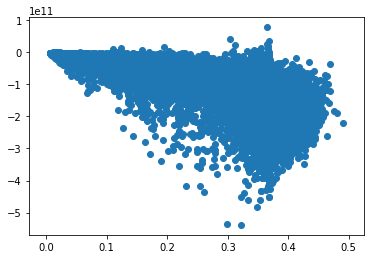

In [ ]:
plt.scatter(y_C_test,predictions_PC) # Good news everyone, the regressor trained on Pauli data is doing badly on the Clifford ones.

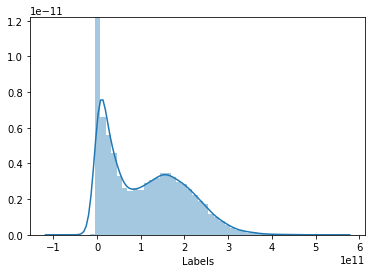

In [ ]:
sns.distplot((y_C_test-predictions_PC))

### Trained on Clifford data

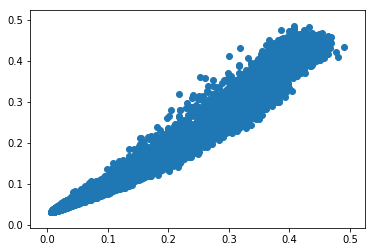

In [ ]:
plt.scatter(y_C_test,predictions_C)

# plt.plot(y_test,predictions, color='r')

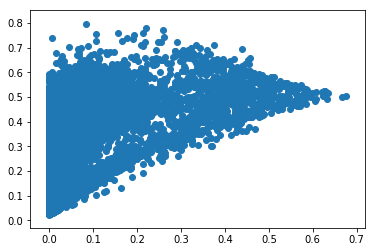

In [ ]:
plt.scatter(y_P_test,predictions_CP) # Good news again, the regressor trained on Clifford data is doing badly on the Pauli ones.

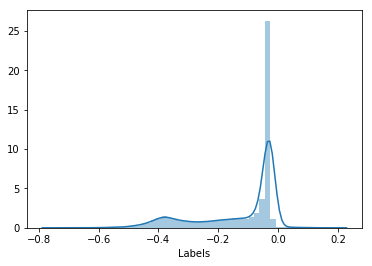

In [ ]:
sns.distplot((y_P_test-predictions_CP))

In [ ]:
from sklearn import metrics

In [ ]:
mae_1 = metrics.mean_absolute_error(y_P_test,predictions_P)
mse_1 = metrics.mean_squared_error(y_P_test,predictions_P)
rmse_1 = np.sqrt(metrics.mean_squared_error(y_P_test,predictions_P))
r2_1 = metrics.r2_score(y_P_test,predictions_P) # best is 1 
print(r2_1)
print(metrics.r2_score(y_C_test,predictions_PC)) # Great, score 0 for the Clifford data.

0.7194280663545434
-8.928840643690744e+23


## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Degree 2 - Will test only Clifford trained, tested to Pauli.

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)

In [ ]:
x_poly_C = polynomial_features.fit_transform(X_C)
x_poly_P = polynomial_features.fit_transform(X_P)

In [ ]:
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(x_poly_C, y_C, test_size=0.4, random_state=101 )
X_P_train, X_P_test, y_P_train, y_P_test = train_test_split(x_poly_P, y_P, test_size=0.4, random_state=101 )

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_C_train, y_C_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
predictions2_C = model.predict(X_C_test)
predictions2_P = model.predict(X_P_test)

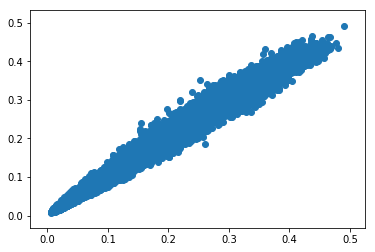

In [ ]:
plt.scatter(y_C_test,predictions2_C)

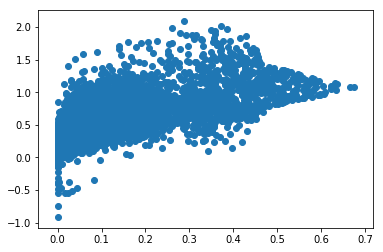

In [ ]:
plt.scatter(y_P_test,predictions2_P)

In [ ]:
print(model.intercept_)

0.3614477661453245


In [ ]:
# Great, Clifford trained regressor is doing badly at Pauli data.
print(r2_score(y_C_test,predictions2_C))
print(r2_score(y_P_test,predictions2_P))


0.9913552021826095
-10.746655822367321


### Polynomial degree 4 - HAVE NOT EDITED THIS

In [ ]:
polynomial_features4= PolynomialFeatures(degree=4)

In [ ]:
x_poly4 = polynomial_features4.fit_transform(X)

In [ ]:
x_poly4.shape

(49152, 1820)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_poly4, y, test_size=0.4, random_state=101 )

In [ ]:
model4 = LinearRegression()

In [ ]:
model4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
predictions4 = model4.predict(X_test)

In [ ]:
print(model4.intercept_)

0.29871546298481


In [ ]:
mae_4 = metrics.mean_absolute_error(y_test,predictions4)
mse_4 = metrics.mean_squared_error(y_test,predictions4)
rmse_4 = np.sqrt(metrics.mean_squared_error(y_test,predictions4))
r2_4 = r2_score(y_test,predictions4) # best is 1 
r2_4 # 0.722 for Paulis

0.9935581350922564

In [ ]:
sns.distplot((y_test-predictions4), bins=50)